In [3]:
'''
Lesson - Advanced Lane Finding
'''

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob



%matplotlib inline
#%matplotlib qt

In [4]:
# Read all the image files
images = glob.glob('./camera_cal/calibration*.jpg')
images = ['./camera_cal\\calibration14.jpg', './camera_cal\\calibration2.jpg']
print(images)

['./camera_cal\\calibration14.jpg', './camera_cal\\calibration2.jpg']


In [5]:
# Empy arrays to hold the points
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

./camera_cal\calibration14.jpg
./camera_cal\calibration2.jpg


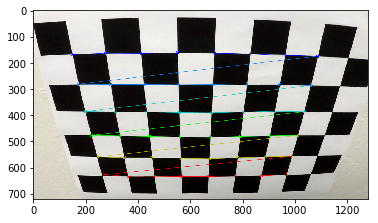

In [6]:

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    #If corners are found, add objet points, image points
    if ret == True:
        print (fname)
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow( img)
        

    
    


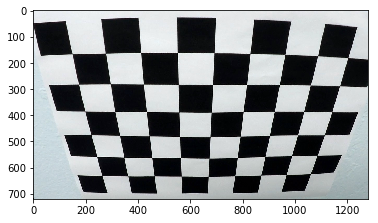

In [7]:
img = cv2.imread('./camera_cal\calibration2.jpg')
plt.imshow(img)

In [8]:
img_size = (img.shape[1], img.shape[0])
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [9]:
print(mtx)

[[  1.05258592e+03   0.00000000e+00   6.58802005e+02]
 [  0.00000000e+00   1.06651117e+03   2.45081812e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


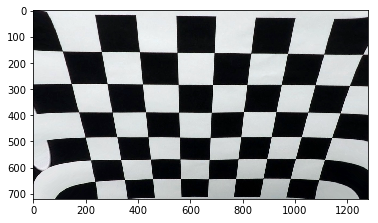

In [10]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

In [11]:
grayd = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(grayd, (8,6), None)
    

In [13]:
print(ret)

False
